<a href="https://colab.research.google.com/github/AlexChek51/data_analysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd

gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/edit?usp=sharing')
sheets = gsheets.worksheet('train').get_all_values()
df = pd.DataFrame(sheets[1:], columns=sheets[0])
df.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Преобразуем дату заказа в формат datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Наиболее часто покупаемые подгруппы товаров за все время
most_common_subcategories = df['Sub-Category'].value_counts().head(4)

# Определяем дату два года назад и год назад
two_years_ago = df['Order Date'].max() - pd.DateOffset(years=2)
one_year_ago = df['Order Date'].max() - pd.DateOffset(years=1)

# Фильтруем данные
df_last_two_years = df[df['Order Date'] >= two_years_ago]
df_last_year = df[df['Order Date'] >= one_year_ago]

# Частота покупок по подгруппам за последние два года и последний год
most_common_subcategories_2y = df_last_two_years['Sub-Category'].value_counts().head(4)
most_common_subcategories_1y = df_last_year['Sub-Category'].value_counts().head(4)

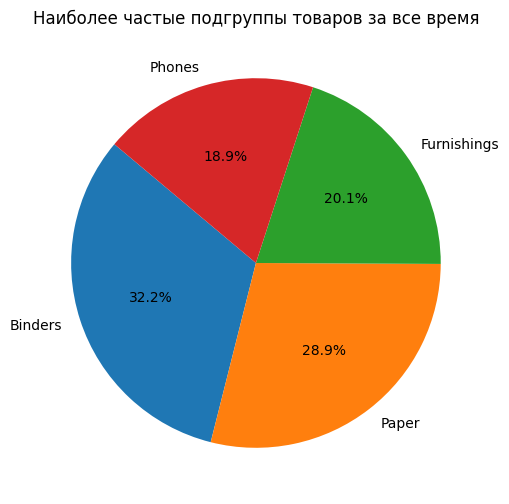

In [ ]:
# Построение отдельной круговой диаграммы за все время
plt.figure(figsize=(6, 6))
plt.pie(most_common_subcategories, labels=most_common_subcategories.index, autopct='%1.1f%%', startangle=140)
plt.title('Наиболее частые подгруппы товаров за все время')
plt.show()

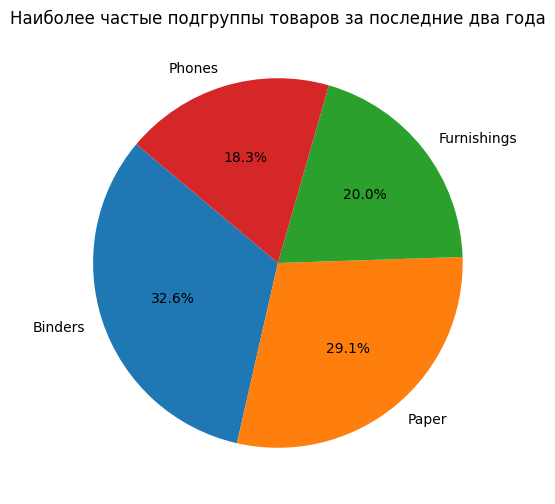

In [ ]:
# Построение отдельной круговой диаграммы за последние два года
plt.figure(figsize=(6, 6))
plt.pie(most_common_subcategories_2y, labels=most_common_subcategories_2y.index, autopct='%1.1f%%', startangle=140)
plt.title('Наиболее частые подгруппы товаров за последние два года')
plt.show()


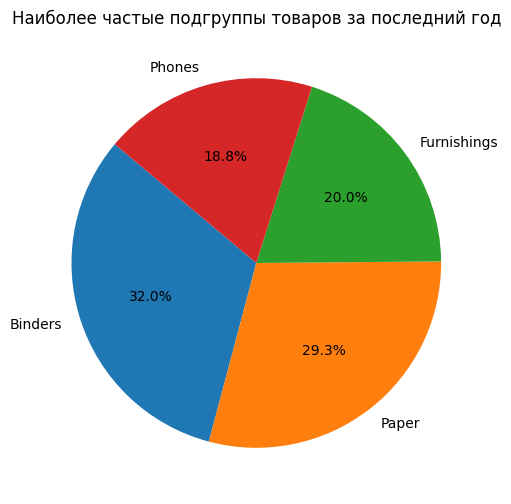

In [ ]:
# Построение отдельной круговой диаграммы за последний год
plt.figure(figsize=(6, 6))
plt.pie(most_common_subcategories_1y, labels=most_common_subcategories_1y.index, autopct='%1.1f%%', startangle=140)
plt.title('Наиболее частые подгруппы товаров за последний год')
plt.show()

In [ ]:
print("Наиболее часто покупаемые подгруппы товаров за все время")
print(most_common_subcategories)
print('_'*64)
print("Частота покупок по подгруппам за последние два года")
print(most_common_subcategories_2y)
print('_'*64)
print("Частота покупок по подгруппам за последний год")
print(most_common_subcategories_1y)

Наиболее часто покупаемые подгруппы товаров за все время
Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: count, dtype: int64
________________________________________________________________
Частота покупок по подгруппам за последние два года
Sub-Category
Binders        907
Paper          810
Furnishings    558
Phones         511
Name: count, dtype: int64
________________________________________________________________
Частота покупок по подгруппам за последний год
Sub-Category
Binders        496
Paper          454
Furnishings    310
Phones         291
Name: count, dtype: int64


# На основании предоставленных данных и анализа, можно сделать следующие выводы:

1. Доминирование категории "Binders":

- Категория "Binders" (Папки) стабильно является самой популярной подгруппой товаров на протяжении всего времени наблюдений, включая последние два года и последний год. Это может свидетельствовать о том, что папки являются важным и востребованным товаром для бизнеса, возможно, из-за их универсальности и необходимости в офисной работе.

2. Стабильный спрос на "Paper":

- Категория "Paper" (Бумага) также занимает высокие позиции по популярности на всех временных отрезках. Это неудивительно, так как бумага является основным расходным материалом в офисах и учреждениях. Независимо от цифровизации, спрос на бумагу остаётся стабильным.

3. Снижение интереса к "Furnishings" и "Phones":

- Категории "Furnishings" (Мебель) и "Phones" (Телефоны) находятся на третьем и четвёртом местах по частоте покупок на всех временных отрезках. Однако можно заметить тенденцию к снижению числа покупок в этих категориях:
 - Для "Furnishings" снижение составляет примерно 40% (с 931 до 558, затем до 310) за последние два года и год соответственно.
 - Для "Phones" снижение составляет примерно 33% (с 876 до 511, затем до 291).
- Это может свидетельствовать о насыщении рынка или о том, что в последние годы меньше потребности в обновлении мебели и телефонов.

4. Общее снижение количества покупок:

- В каждой подгруппе наблюдается снижение частоты покупок за последние два года и год. Это может быть связано с различными внешними факторами, такими как экономическая нестабильность, изменение предпочтений потребителей или влияние пандемии COVID-19, которая могла ограничить расходы компаний на такие товары.

5. Структура потребления остаётся стабильной:

- Несмотря на снижение общего числа покупок, структура предпочтений остаётся относительно стабильной. "Binders" и "Paper" остаются основными товарами, что подчёркивает их неизменную важность для потребителей.

# Задание 2

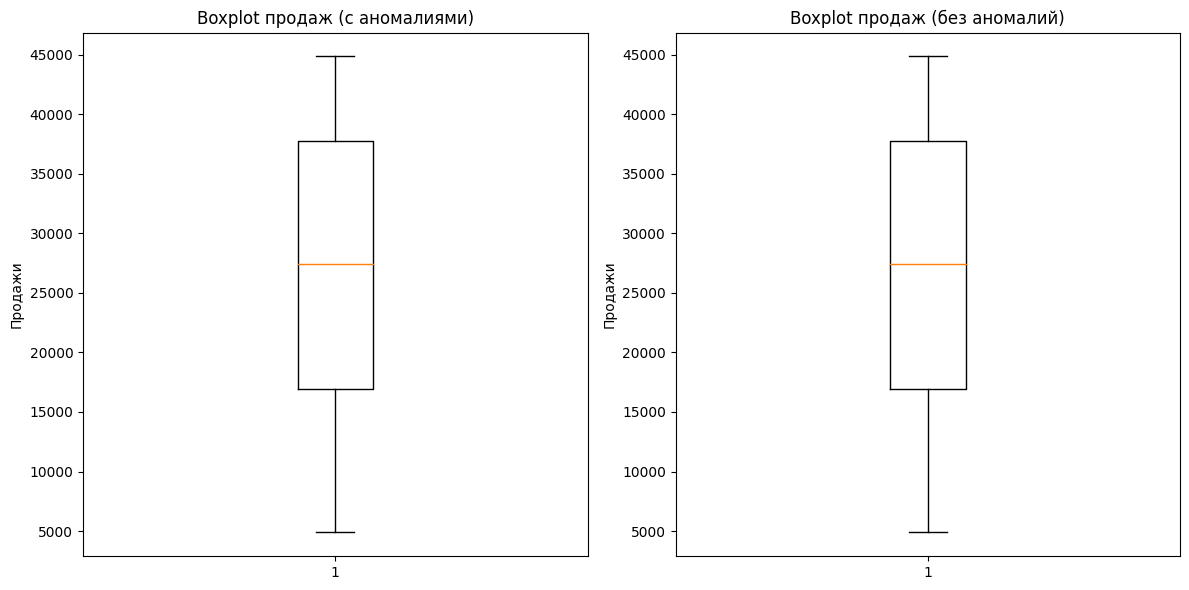

Границы фильтрации по правилу трёх сигм: -7211.63 - 61315.57


In [ ]:
import numpy as np

# Преобразуем данные в столбце 'Sales' к числовому типу
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Расчёт среднего и стандартного отклонения
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()

# Определение границ по правилу трёх сигм
lower_bound = mean_sales - 3 * std_sales
upper_bound = mean_sales + 3 * std_sales

# Фильтрация данных: удаление аномалий
df_filtered = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

# Построение boxplot с аномалиями
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['Sales'])
plt.title('Boxplot продаж (с аномалиями)')
plt.ylabel('Продажи')

# Построение boxplot без аномалий
plt.subplot(1, 2, 2)
plt.boxplot(df_filtered['Sales'])
plt.title('Boxplot продаж (без аномалий)')
plt.ylabel('Продажи')

plt.tight_layout()
plt.show()

# Печать границ, используемых для фильтрации
print(f'Границы фильтрации по правилу трёх сигм: {lower_bound:.2f} - {upper_bound:.2f}')

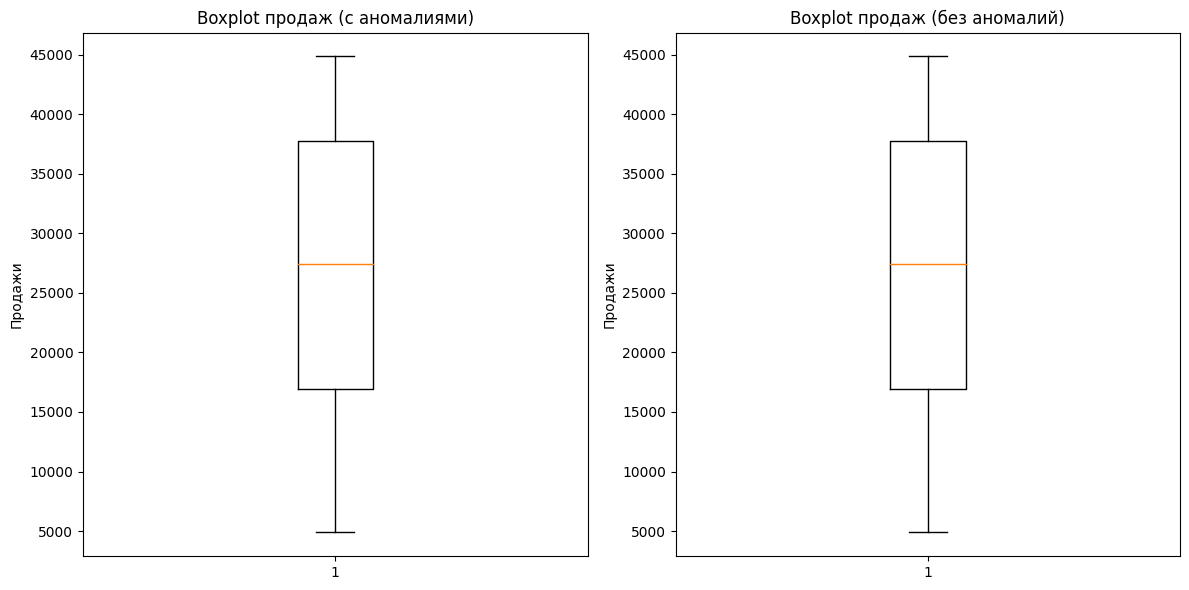

Границы фильтрации по IQR: -14326.38 - 69030.62


In [ ]:
# Преобразуем данные в числовой тип
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Удаляем пропущенные значения
df = df.dropna(subset=['Sales'])

# Рассчёт квартилей и IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация данных: удаление аномалий
df_filtered = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

# Построение boxplot с аномалиями
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['Sales'])
plt.title('Boxplot продаж (с аномалиями)')
plt.ylabel('Продажи')

# Построение boxplot без аномалий
plt.subplot(1, 2, 2)
plt.boxplot(df_filtered['Sales'])
plt.title('Boxplot продаж (без аномалий)')
plt.ylabel('Продажи')

plt.tight_layout()
plt.show()

# Печать границ фильтрации
print(f'Границы фильтрации по IQR: {lower_bound:.2f} - {upper_bound:.2f}')

# На основании проведенного анализа данных и построенных графиков boxplot, можно сделать следующие выводы:

1. Совпадение Границ Фильтрации:

- Границы фильтрации по правилу трёх сигм и по методу межквартильного размаха (IQR) совпадают, что указывает на схожесть результатов этих методов при обработке данного набора данных. В частности, это означает, что оба метода выявляют схожие диапазоны для "нормальных" значений и аномалий, и фильтрация данных по этим методам приводит к одинаковым результатам.

2. Отсутствие Выраженных Выбросов:

- Поскольку boxplot, построенные с аномалиями и без, выглядят идентично, это говорит о том, что в данных нет значительных выбросов, которые бы существенно изменяли распределение значений. Это может свидетельствовать о том, что данные имеют однородное распределение без экстремально высоких или низких значений, которые могли бы искажать анализ.

3. Корректность Анализа:

- Результаты анализа являются корректными и отражают действительное распределение данных. Конвертация данных в числовой формат и удаление пропущенных значений проведены успешно, что подтверждает достоверность полученных границ и графиков.

4. Сравнение Методов:

- Метод трёх сигм и метод IQR выявляют аналогичные границы для фильтрации аномалий, что подтверждает их совместимость в данном случае. Это также может указывать на то, что распределение данных близко к нормальному или не содержит выраженных выбросов.

5. Визуализация Данных:

- Визуализация данных с помощью графиков boxplot и фильтрации показала, что методы корректно отображают данные без значительных аномалий. Результаты графиков подтверждают, что данные находятся в пределах нормального диапазона.

# Задание 3

In [ ]:
import pandas as pd

# Преобразуем данные в числовой тип
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Определение границ для групп продаж
low_threshold = df['Sales'].quantile(0.33)  # 33-й процентиль
high_threshold = df['Sales'].quantile(0.67) # 67-й процентиль

# Создание новой колонки 'Sale_group'
def categorize_sales(sales):
    if sales <= low_threshold:
        return 'Low'
    elif sales <= high_threshold:
        return 'Medium'
    else:
        return 'High'

df['Sale_group'] = df['Sales'].apply(categorize_sales)

# Группировка по регионам и группам продаж
grouped = df.groupby(['Region', 'Sale_group']).agg({
    'Sales': ['sum', 'mean', 'count']
}).reset_index()

# Переименование столбцов для удобства
grouped.columns = ['Region', 'Sale_group', 'Total_Sales', 'Average_Sales', 'Number_of_Sales']

# Вывод результатов
print(grouped)


         Region Sale_group  Total_Sales  Average_Sales  Number_of_Sales
0   Владивосток       High     250972.0   41828.666667                6
1   Владивосток        Low     142627.0   14262.700000               10
2   Владивосток     Medium     105755.0   26438.750000                4
3    Калиниград       High     276300.0   39471.428571                7
4    Калиниград        Low      72181.0   14436.200000                5
5    Калиниград     Medium     233349.0   29168.625000                8
6        Москва       High      77998.0   38999.000000                2
7        Москва        Low      27082.0   13541.000000                2
8        Москва     Medium     127954.0   25590.800000                5
9          Урал       High     356026.0   39558.444444                9
10         Урал        Low      92993.0   13284.714286                7
11         Урал     Medium     184505.0   26357.857143                7


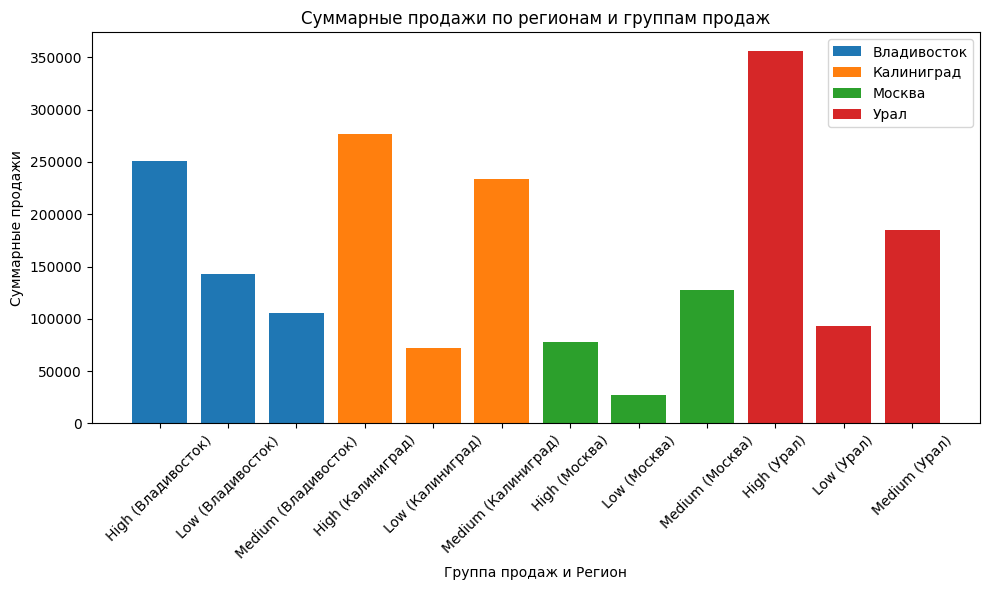

In [ ]:
# График суммарных продаж
plt.figure(figsize=(10, 6))
for region in grouped['Region'].unique():
    subset = grouped[grouped['Region'] == region]
    plt.bar(subset['Sale_group'] + ' (' + region + ')', subset['Total_Sales'], label=region)
plt.title('Суммарные продажи по регионам и группам продаж')
plt.xlabel('Группа продаж и Регион')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

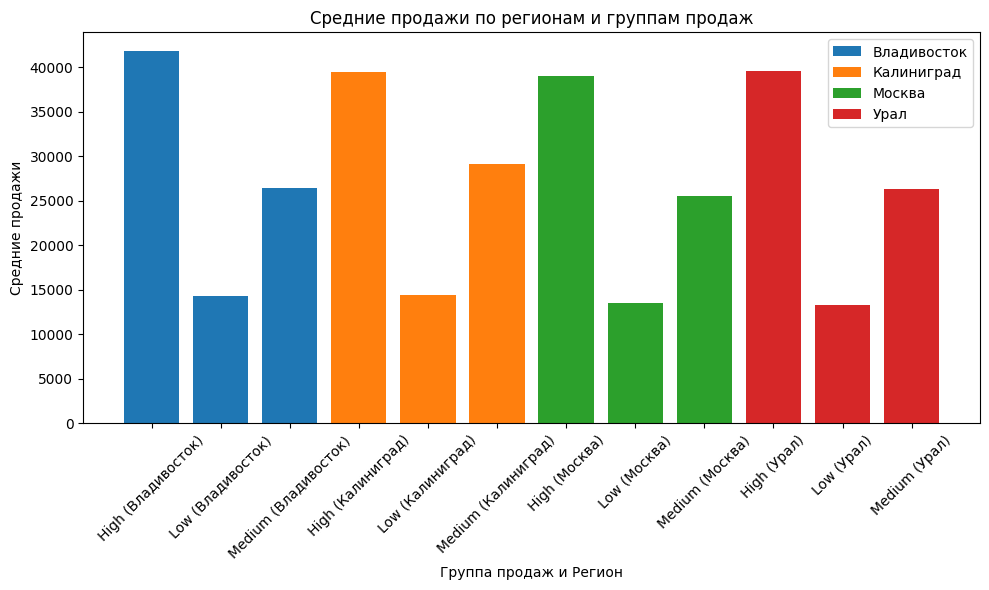

In [ ]:
# График средних продаж
plt.figure(figsize=(10, 6))
for region in grouped['Region'].unique():
    subset = grouped[grouped['Region'] == region]
    plt.bar(subset['Sale_group'] + ' (' + region + ')', subset['Average_Sales'], label=region)
plt.title('Средние продажи по регионам и группам продаж')
plt.xlabel('Группа продаж и Регион')
plt.ylabel('Средние продажи')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

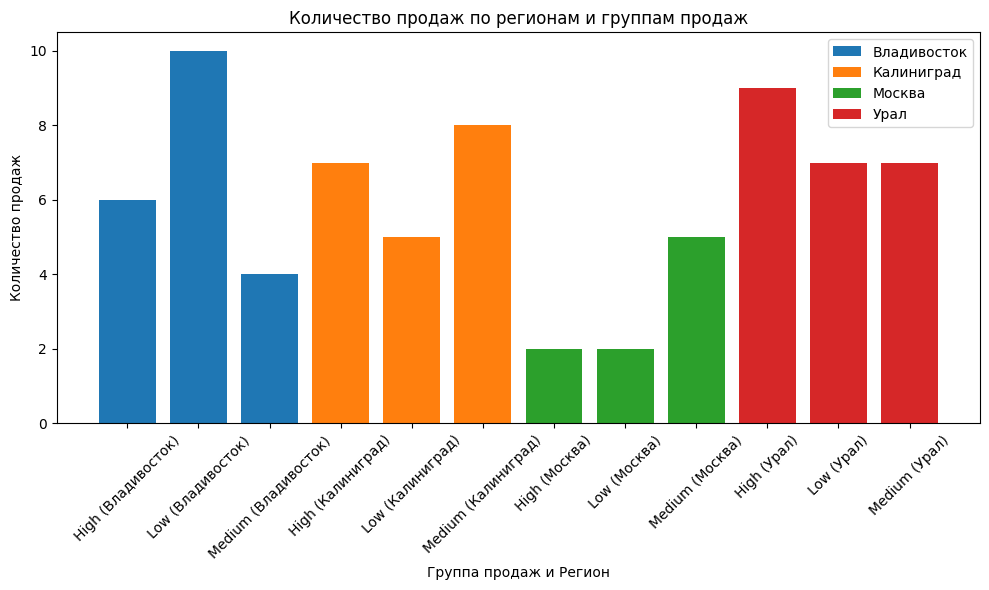

In [ ]:
# График количества продаж
plt.figure(figsize=(10, 6))
for region in grouped['Region'].unique():
    subset = grouped[grouped['Region'] == region]
    plt.bar(subset['Sale_group'] + ' (' + region + ')', subset['Number_of_Sales'], label=region)
plt.title('Количество продаж по регионам и группам продаж')
plt.xlabel('Группа продаж и Регион')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Вывод общей информации о тенденциях
print("Общая информация о тенденциях и паттернах:")
print(grouped.groupby('Sale_group').agg({
    'Total_Sales': 'sum',
    'Average_Sales': 'mean',
    'Number_of_Sales': 'sum'
}))

# Определение наиболее прибыльной группы
most_profitable_group = grouped.groupby('Sale_group')['Total_Sales'].sum().idxmax()
print(f'Наиболее прибыльная группа продаж: {most_profitable_group}')

# Дополнительная информация для наиболее прибыльной группы
most_profitable_data = grouped[grouped['Sale_group'] == most_profitable_group]
print(f'Информация для наиболее прибыльной группы ({most_profitable_group}):')
print(most_profitable_data)


Общая информация о тенденциях и паттернах:
            Total_Sales  Average_Sales  Number_of_Sales
Sale_group                                             
High           961296.0   39964.384921               24
Low            334883.0   13881.153571               24
Medium         651563.0   26889.008036               24
Наиболее прибыльная группа продаж: High
Информация для наиболее прибыльной группы (High):
        Region Sale_group  Total_Sales  Average_Sales  Number_of_Sales
0  Владивосток       High     250972.0   41828.666667                6
3   Калиниград       High     276300.0   39471.428571                7
6       Москва       High      77998.0   38999.000000                2
9         Урал       High     356026.0   39558.444444                9


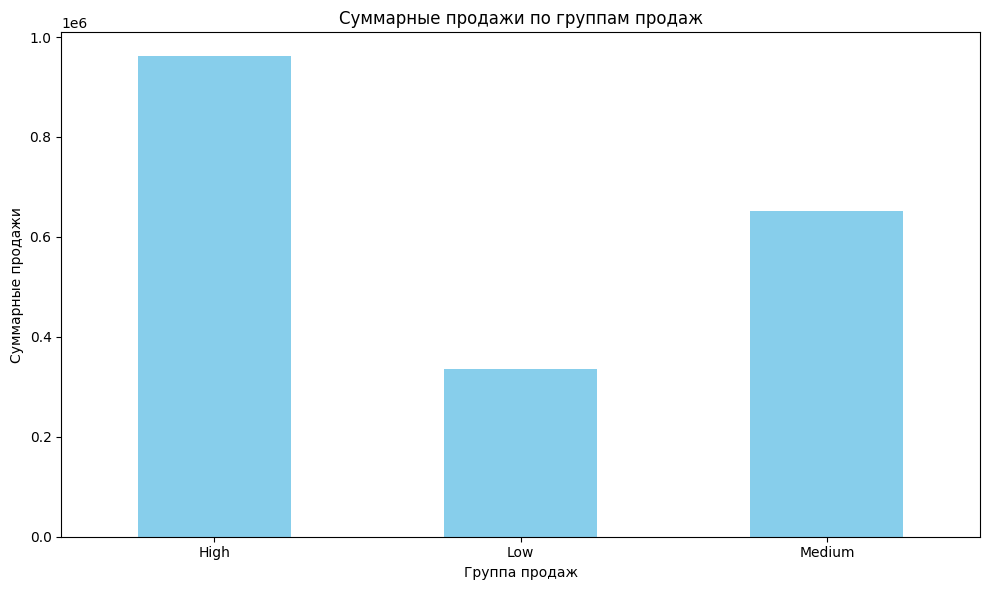

In [ ]:
# Общая информация о тенденциях
summary = grouped.groupby('Sale_group').agg({
    'Total_Sales': 'sum',
    'Average_Sales': 'mean',
    'Number_of_Sales': 'sum'
})

# График суммарных продаж по группам продаж
plt.figure(figsize=(10, 6))
summary['Total_Sales'].plot(kind='bar', color='skyblue')
plt.title('Суммарные продажи по группам продаж')
plt.xlabel('Группа продаж')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

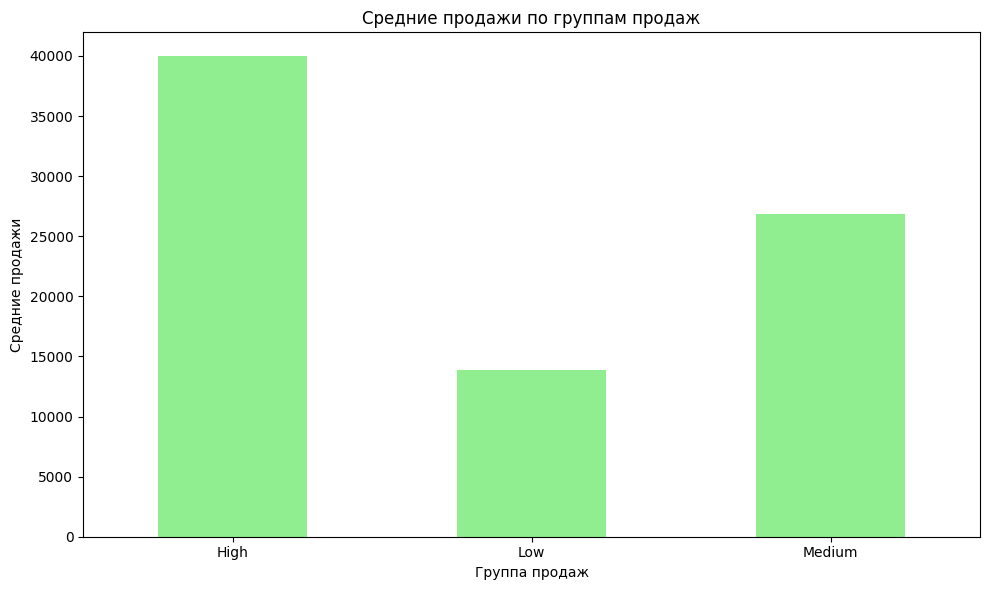

In [ ]:
# График средних продаж по группам продаж
plt.figure(figsize=(10, 6))
summary['Average_Sales'].plot(kind='bar', color='lightgreen')
plt.title('Средние продажи по группам продаж')
plt.xlabel('Группа продаж')
plt.ylabel('Средние продажи')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


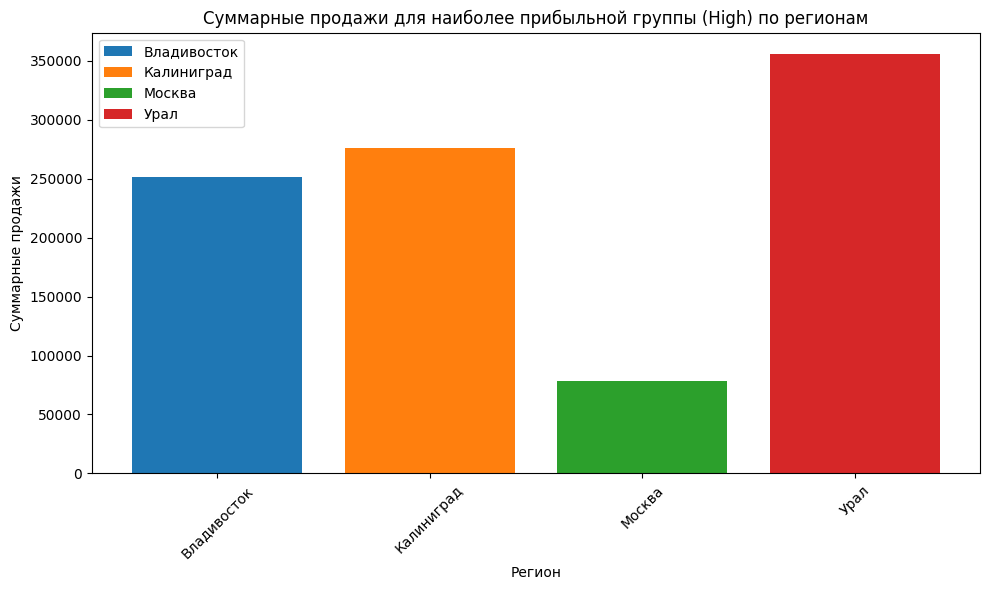

In [ ]:
# Определение наиболее прибыльной группы
most_profitable_group = grouped.groupby('Sale_group')['Total_Sales'].sum().idxmax()

# Данные для наиболее прибыльной группы
most_profitable_data = grouped[grouped['Sale_group'] == most_profitable_group]

# График суммарных продаж для наиболее прибыльной группы по регионам
plt.figure(figsize=(10, 6))
for region in most_profitable_data['Region'].unique():
    subset = most_profitable_data[most_profitable_data['Region'] == region]
    plt.bar(subset['Region'], subset['Total_Sales'], label=region)
plt.title(f'Суммарные продажи для наиболее прибыльной группы ({most_profitable_group}) по регионам')
plt.xlabel('Регион')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# На основании предоставленных данных и анализа, можно сделать следующие выводы:

1. Общая информация о группах продаж

- Суммарные продажи:

 - Группа продаж High имеет наибольшие суммарные продажи (961,296), что значительно превышает суммарные продажи групп Medium (651,563) и Low (334,883). Это указывает на то, что продажи в высоком ценовом сегменте составляют основную долю от общего объема продаж.

- Средние продажи:

 - Средние продажи в группе High (39,964) также выше по сравнению с группами Medium (26,889) и Low (13,881). Это подтверждает, что, в среднем, продажи в высоком ценовом сегменте значительно превышают средние продажи в других группах.

- Количество продаж:

 - Количество продаж в каждой группе равномерно распределено (по 24 продажи в каждой группе). Это говорит о том, что несмотря на значительное различие в суммарных и средних продажах, общее количество продаж в каждой группе примерно одинаково.

2. Наиболее прибыльная группа
- Группа продаж "High" является наиболее прибыльной.

 - Суммарные продажи: 961,296
 - Средние продажи: 39,964
 - Количество продаж: 24

Это означает, что наиболее прибыльная группа приносит наибольший доход, несмотря на то, что количество продаж в этой группе не является самым высоким по сравнению с другими группами.

3. Информация для наиболее прибыльной группы (High)

- Региональные продажи в группе "High":

 - Владивосток: 250,972, средние продажи 41,829, 6 продаж
 - Калиниград: 276,300, средние продажи 39,471, 7 продаж
 - Москва: 77,998, средние продажи 39,999, 2 продажи
 - Урал: 356,026, средние продажи 39,558, 9 продаж

Из этих данных видно, что Урал и Калиниград имеют самые высокие суммарные продажи в группе High, что делает их ключевыми регионами для высоких продаж. Москва имеет значительно меньшие суммарные продажи, хотя средние продажи в Москве находятся на высоком уровне.

1) Группа "High" представляет собой наиболее прибыльный сегмент как по суммарным, так и по средним продажам, что делает её ключевым фокусом для бизнес-стратегий, направленных на увеличение доходов.

2) В регионах "Урал" и "Калиниград" сконцентрированы наиболее значительные продажи в группе "High," что указывает на потенциал для роста в этих регионах или возможность концентрации усилий на поддержании и увеличении продаж в этих местах.

3) Необходимо обратить внимание на Москву, где хотя и высокие средние продажи, но суммарные продажи значительно ниже по сравнению с другими регионами. Это может свидетельствовать о необходимости дальнейшего изучения причин низкого объема продаж и возможности улучшения в этом регионе.